<a id="top"></a>

<h2 id="loading_liberary">LOADING LIBERARY</h2>

In [354]:
import itertools
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline

from geopy import distance
import folium


from scipy import stats
from scipy.stats import norm
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import FunctionTransformer, quantile_transform, scale, StandardScaler, MinMaxScaler, StandardScaler, Normalizer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

%run "./project_class.ipynb"
func=Master

<h2 id="loading_dataset">LOADING DATASET</h2>

In [355]:
# df.to_csv('./data/kc_house_data.gz', compression='gzip')
df = pd.read_csv("./data/kc_house_data.gz", index_col=None)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [356]:
print("the data set contains {0:,} rows and {1} columns".format(df.shape[0], df.shape[1]))

the data set contains 21,597 rows and 22 columns


Column Names and descriptions for Kings County Data Set

     id             unique identified for a house
     date           Date house was sold
     price          Price  is prediction target
     bedrooms       Number of Bedrooms/House
     bathrooms      Number  of bathrooms/bedrooms
     sqft_living    square footage of the home
     sqft_lot       square footage of the lot
     floors         Total floors (levels) in house
     waterfront     House which has a view to a waterfront
     view           Has been viewed
     condition      How good the condition is ( Overall )
     grade          overall grade given to the housing unit, based on King County grading system
     sqft_above     square footage of house apart from basement
     sqft_basement  square footage of the basement
     yr_built       Built Year
     yr_renovated   Year when house was renovated
     zipcode        zip
     lat            Latitude coordinate
     long           Longitude coordinate
     sqft_living15  The square footage of interior housing living space for the nearest 15 neighbors
     sqft_lot15     The square footage of the land lots of the nearest 15 neighbors

<h2 id="descriptive">DESCRIPTIVE STATISTICS</h2>

In [357]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

<a href="#top">TOP!</a>

<h2 id="data_scrubbing">DATA SCRUBBING</h2>
<p style="color:DodgerBlue;">Check Missing Values</p>

In [359]:
for i in df.columns:
    total_nan = df[i].isnull().sum()
    if total_nan > 0:
        print("total missing value of {0:>15}is: {1:>5}".format(i, total_nan))
del total_nan

total missing value of      waterfrontis:  2376
total missing value of            viewis:    63
total missing value of    yr_renovatedis:  3842


<p style="color:DodgerBlue;">both columns "view" and "waterfront" are categories where the "view" represented with the value 1 if the house has been seen and the "waterfront" represented with 1 if the house has waterfront, those will be filled with zeros.</p>

In [360]:
df['waterfront'].fillna(value=0, axis=0, inplace=True)
df['view'].fillna(value=0, axis=0, inplace=True)

<p style="color:DodgerBlue;">
the column "yr_renovated" represents the year in which the house was renovated, we noticed that only 744 houses were renovated. since the proportion of the renovated houses is so few compared to the entire column, it would make more sense if we use it as a category where we assign 1 to the renovated houses and 0 to those that are not.</p>

In [361]:
df['yr_renovated'].fillna(value=0, axis=0, inplace=True)
df.loc[df['yr_renovated']!=0, ['yr_renovated']] = 1
df.loc[:,'yr_renovated'] = df['yr_renovated'].apply(np.int)  #.astype('int')
df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

<h2></h2>
<p style="color:DodgerBlue;">Drop the column "Unnamed: 0" from axis 1 matching the string by RegEx</p>

In [362]:
un_named_columns = df.iloc[:,df.columns.str.contains('^Unnamed', case=False, regex=True)]
df.drop(un_named_columns, axis=1, inplace=True)
del un_named_columns

<p style="color:DodgerBlue;">Drop "ID column"</p>

In [363]:
df.drop(columns=['id'], inplace=True)
df['date'] = pd.to_datetime(df['date'], utc=False)

<a href="#top">TOP!</a>

<h2 id="data_exploration">DATA EXPLORATION</h2>
<p style="color:DodgerBlue;">We start exploring our variable selecting the candidate variables that have significant correlation to our model</p>

In [364]:
#define a list for the variables to exclude
var_excluded = set()

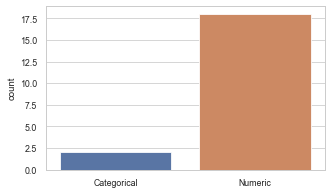

In [365]:
# generate a list to categorize our variables type
variables_type = [ "Numeric" if df[col].dtype in ['int64', 'float64'] else "Categorical" for col in df.columns]
plt.figure(figsize=(5,3))
sns.countplot(x=variables_type)
plt.show()

<h2 id="bedrooms">BEDROOMS</h2>

<AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>

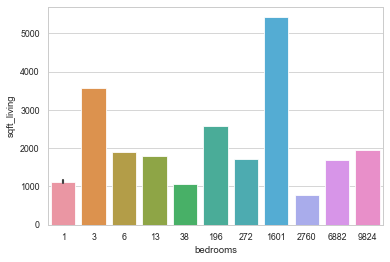

In [366]:
fig, ax1 = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(6,4)
sns.axes_style()
sns.barplot(x=df.bedrooms.value_counts(), y=df.sqft_living)

<h2 id="sqft_basement">SQFT_ABOVE & SQFT_BASEMENT</h2>

<p style="color:DodgerBlue;">regarding the 2 variables "sqft_above" "sqft_basement" we noticed that the sum of both represents the actual square feet of the entire living area.</p>

<p style="color:DodgerBlue;">in fact if we take for example line number 3 where "sqft_living" is 1960 the sqft_above "is 1050 it is easy to come out with the difference of "sqft_basement" which is 910.</p>

<p style="color:DodgerBlue;">in the real world we calculate the house price if the basement is finished since we do not have sufficient data to determine this data, we exclude this variable from our analyzes.</p>

In [367]:
var_excluded.update(('sqft_above', 'sqft_basement'))

<h2 id="sqft_lot">SQFT_LOT & SQFT_LIVING</h2>
<p style="color:DodgerBlue;">
Let us examine the importance of having a large lot. We will define a ratio of sqft_living over sqft_lot to understand if there is an ideal trade-off between lot size (presumably garden) and living space.</p>

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

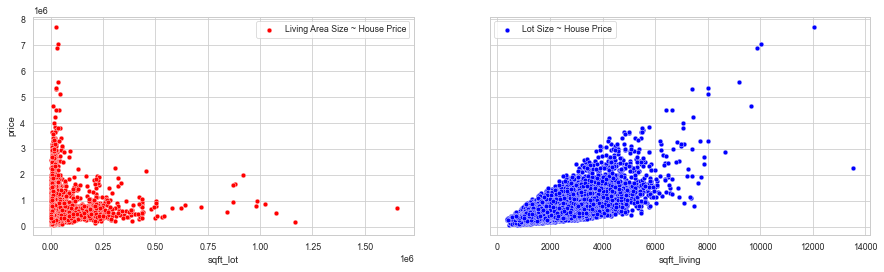

In [368]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_figwidth(15,10)
sns.axes_style()
sns.scatterplot(x=df.sqft_lot, y=df.price, color='red',  ax=ax1, label='Living Area Size ~ House Price')
sns.scatterplot(x=df.sqft_living, y=df.price, color='blue', ax=ax2, label='Lot Size ~ House Price')

In [369]:
_ = np.size(np.where((np.array(df.sqft_living/df.sqft_lot)) >= 1))
print('total houses with sqft_living >= sqft_lot:', _)

total houses with sqft_living >= sqft_lot: 788


<p style="color:DodgerBlue;">unexpectedly we got 788 houses where the square footage of living aerea "sqft_living" is greater than lot square footage "sqft_lot", it's more likely about detached structures like garage, patios or even basement.</p>

<h2 id="floors">FLOORS</h2>

<AxesSubplot:xlabel='floors', ylabel='price'>

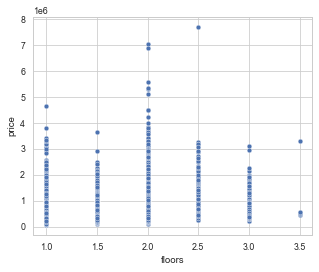

In [370]:
fig, ax1 = plt.subplots(ncols=1, sharey=True)
fig.set_figwidth(5,5)
sns.scatterplot(x=df['floors'], y=df['price'], ax=ax1)

<h2 id="waterfront">WATERFRONT</h2>
<p style="color:DodgerBlue;">the waterfront column describes whether the house has waterfront with the value 1, otherwise the value 0, as observed only 146 houses has a waterfront, that is less than 1% of the entire dataset
</p>

In [371]:
df['waterfront'].value_counts().to_frame()

,waterfront
0.0,21451
1.0,146


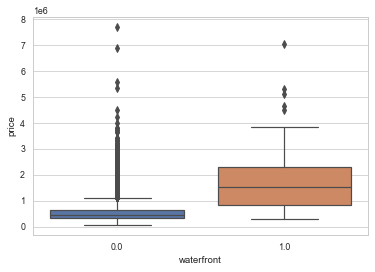

In [372]:
fig, ax1 = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(6,4)
sns.axes_style()
waterfront_bp = sns.boxplot(x=df['waterfront'], y=df['price'], ax=ax1)

<p style="color:DodgerBlue;">count the unique values of the 'floors' & 'waterfront' to determine the houses type.</p>

In [373]:
df['floors'].value_counts().to_frame()

,floors
1.0,10673
2.0,8235
1.5,1910
3.0,611
2.5,161
3.5,7


<h2 id="view">VIEW</h2>
<p style="color:DodgerBlue;">the variable "view" describes the times that the house has been seen, however we have noticed that 19485 of the data are quale to zero.</p>

<AxesSubplot:xlabel='view', ylabel='count'>

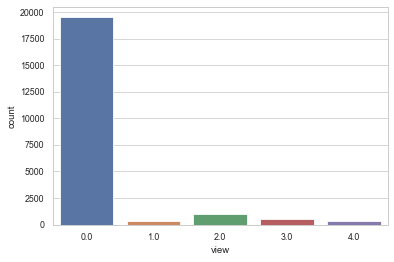

In [374]:
fig, ax1 = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(6,4)
sns.axes_style()
sns.countplot(x=df['view'], ax=ax1)

In [375]:
print("view: zeros value: {0:>10}".format((df.view==0).sum()))
print("renovated: zeros value: {0:>5}".format( (df.renovated==0).sum() ))

view: zeros value:      19485
renovated: zeros value: 20853


<p style="color:DodgerBlue;">we're goin to exclude the 'view' column since it contains almost all null values.</p>

In [376]:
var_excluded.add(('view'))

<h2 id="condition">CONDITION</h2>

<p style="color:DodgerBlue;">
Relative to age and grade. Coded 1-5.<br>
    1 = Poor- Worn out.<br>
    2 = Fair- Badly worn.<br>
    3 = Average <br>
    4 = Good<br>
    5= Very Good}</p>

<AxesSubplot:xlabel='condition', ylabel='price'>

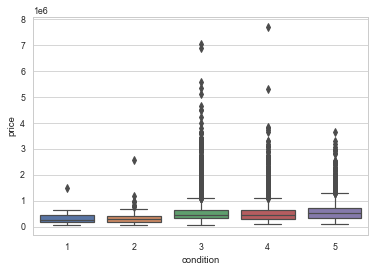

In [377]:
fig, ax1 = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(6,4)
sns.axes_style()
sns.boxplot(x=df['condition'], y=df['price'], ax=ax1)

<h2 id="grade">GRADE</h2>

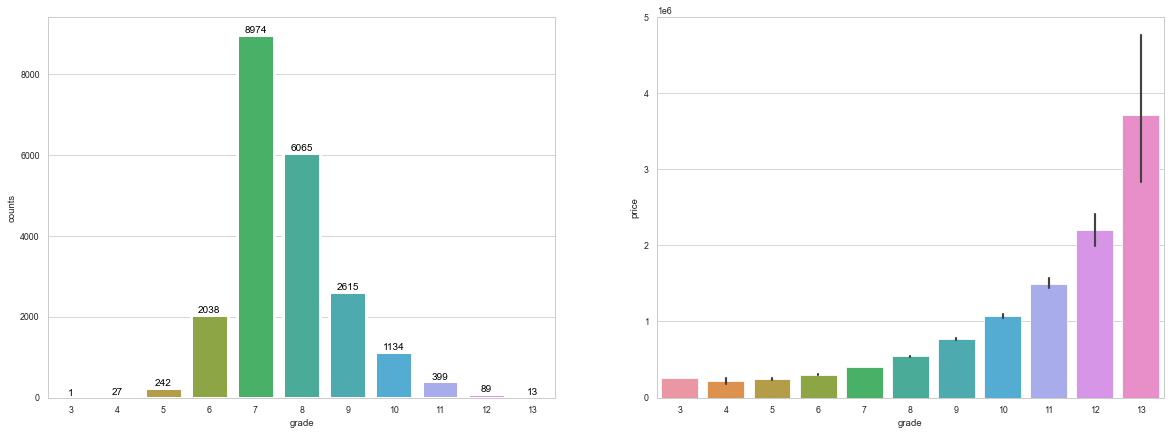

In [378]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
fig.set_size_inches(20,7)
sns.axes_style()
df_by_grade = df.groupby('grade').size().reset_index(name='counts')
g = sns.barplot(x='grade', y='counts', data=df_by_grade, linewidth=3, errcolor='gray', ax=ax1)
for index, row in df_by_grade.iterrows():
    g.text(row.name, row.counts, round(row.counts, 2), color='black', va='bottom',  ha="center", fontsize=10)
g2=sns.barplot(x='grade', y='price', data=df, ax=ax2)
plt.savefig('grade.png')

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

    1-3 Falls short of minimum building standards. Normally cabin or inferior structure
    4   Generally older, low quality construction. Does not meet code.\n
    5   Low construction costs and workmanship. Small, simple design.
    6   Lowest grade currently meeting building code. Low quality materials and simple designs.
    7   Average grade of construction and design. Commonly seen in plats and older sub-divisions.
    8   Just above average in construction and design. 
        Usually better materials in both the exterior and interior finish work.
    9   Better architectural design with extra interior and exterior design and quality.
    10  Homes of this quality generally have high quality features. Finish work is better and more design
        quality is seen in the floor plans. Generally have a larger square footage.
    11  Custom design and higher quality finish work with added amenities of solid woods, 
        bathroom fixtures and more luxurious options.
    12  Custom design and excellent builders. All materials are of the highest quality and
        all conveniences are present.
    13  Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work,
        wood trim, marble, entry ways etc.
        
        for more info visit:
<a href="https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b">King County link</a>

### let's compare the lot size with the living area and the percentage of living aerea compared to the lot size

<h2 id="yr_built">YR_BUILT</h2>

<p style="color:DodgerBlue;">
Let's count the houses based on the year of construction, it seems to have a strong correlation/p>

<AxesSubplot:>

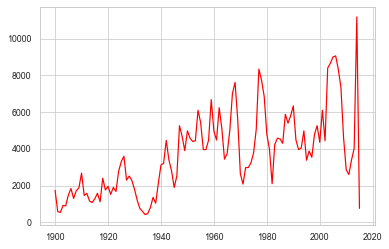

In [383]:
yr_built_unique = df.yr_built.unique()
n_construction  = [df[df.yr_built == j].size for j in df.yr_built.unique()]
sns.lineplot(x=yr_built_unique, y=n_construction, color='red')

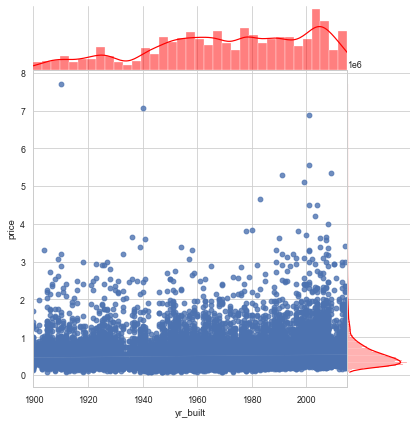

In [384]:
sns.jointplot(x="yr_built", y="price", data=df, kind="reg", space=0, marginal_kws={'lw':0.3, 'color':'red'})

<h2 id="price_distribution">PRICE DISTRIBUTION</h2>
<p style="color:DodgerBlue;">simple Seaborn scatterplot shows homes by their latitude and longitude, with price set as the hue.</p>

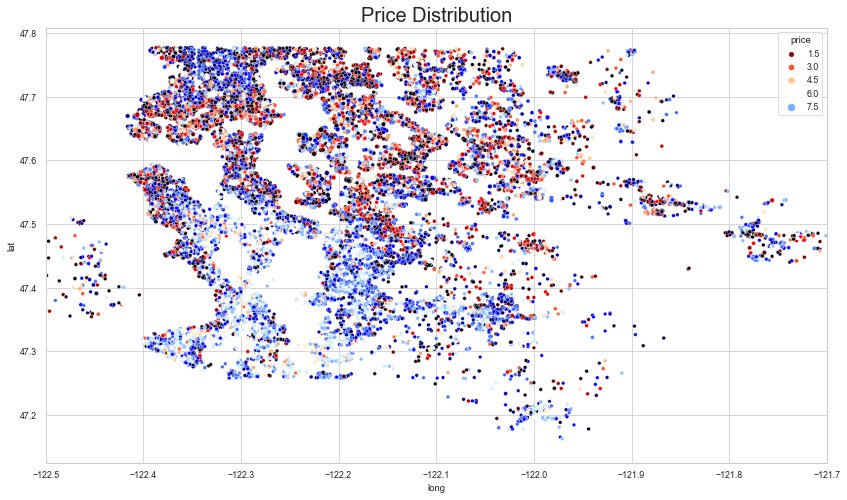

<Figure size 432x288 with 0 Axes>

In [385]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=df.long, y=df.lat, hue=df.price, size=df.price, palette='flag')
plt.xlim(-122.5, -121.7)
plt.title('Price Distribution', fontdict={'fontsize': 20})
plt.show()
plt.savefig('price_distribution.png')

<a href="#top">TOP!</a>

<p style="color:DodgerBlue;">let's visualize the top 70 zip codes with with an interactive geographic map</p>

In [386]:
waterfront_1 = df.loc[df.waterfront==1,'price'].mean()
waterfront_0 = df.loc[df.waterfront==0,'price'].mean()
print(f"{'the waterfront house prices are higher by'} {(waterfront_1/waterfront_0)*100:.2f}%")

the waterfront house prices are higher by 322.61%


In [389]:
dfzip = df.drop_duplicates('zipcode', keep='first')
centerlat = (dfzip['lat'].max() + dfzip['lat'].min()) / 2
centerlong = (dfzip['long'].max() + dfzip['long'].min()) / 2
map = folium.Map(location=[centerlat, centerlong], zoom_start=9)
#icon = folium.Icon(color='blue', icon_color='white', icon='info-sign',angle=0)

for i in range(dfzip.shape[0]):
    pup = '${:,}'.format(dfzip.iloc[i]['price'])
    if dfzip.iloc[0]['waterfront'] == 1:
        ic = folium.Icon(color='red', icon_color='red')
    else:
        ic = folium.Icon(color='blue', icon_color='white')
    folium.Marker([dfzip.iloc[i]['lat'], dfzip.iloc[i]['long']], icon=ic, popup=pup, radius=3).add_to(map)
# map.save('top_70_zipcode.html')
map

<h2 id="top">FEATURE ENGINEERING</h2>
<p style="color:DodgerBlue;">exclude variables that are not relevant to the analysis, we're going to use the scatterplot matrix to evaluate the correlation and the Multicollinearity.</p>

In [390]:
var_excluded.update(('lat','long', 'zipcode', 'bathrooms','date'))

In [391]:
var_predictors = set(df.columns)-var_excluded

<h2 id="long_lat">LONG & LAT</h2>
<p style="color:DodgerBlue;">From previous plot we notice that the price seems to go down as houses are further from the center,
It would be appropriate to create a new feature that represents distance from the center of King County.
for feature we used the geopy library, which essentially calculates the distance in miles from specific latitude and longitude points..</p>

In [392]:
lat_long=[(x,y) for x,y in zip(df['lat'], df['long'])]
kc = (47.6062, -122.3321) # king county usa downtown lat long
miles = [int(round(distance.distance(i, kc).miles,0)) for i in lat_long ]
df['distance'] = miles
var_predictors.add(('distance'))

<AxesSubplot:xlabel='distance', ylabel='price'>

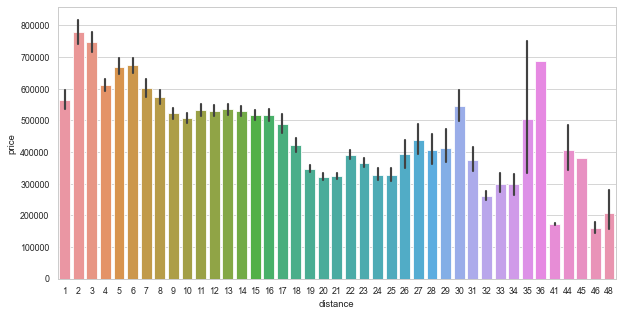

In [400]:
plt.figure(figsize=(10,5))
sns.barplot(x='distance', y='price', data=df)

<h2 id="cat_var">Categorical Variables</h2>
<p style="color:DodgerBlue;">once we have identified the category variables, let's take a final visual look at the variables for further confirmation.</p>

In [401]:
var_categories =  {'condition', 'waterfront', 'floors', 'renovated', 'bedrooms' }

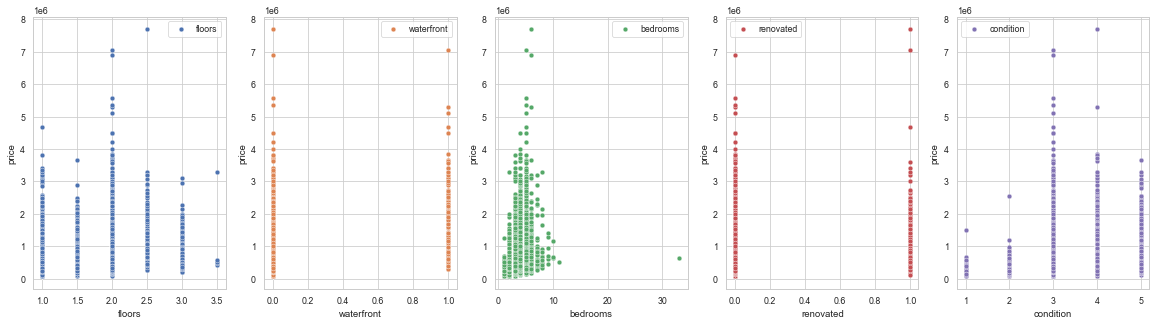

In [402]:
palette = itertools.cycle(sns.color_palette())
fig, axes = plt.subplots(nrows=1, ncols=len(var_categories), figsize=(20,5))
for xcol, ax in zip(var_categories, axes):
#     df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    sns.scatterplot(x=df[xcol], y=df['price'] , ax=ax, label=xcol, color=next(palette))

<p style="color:DodgerBlue;">as we see from the graph it seems that variables are cattegoric type except for "yr_built" which is almost obvious given that the construction dates of the houses have an almost continuous value. so we're going to use the pandas CUT method to segment these values into groups of "bins".</p>

In [403]:
yr_built_bins = [1900,1923,1946,1969,1992,2015]
yr_built_labels = ['1900_1923','1924_1946','1947_1969','1970_1992','1993_2015']
yr_built_cat = pd.cut(x=df['yr_built'], bins=yr_built_bins, labels=yr_built_labels, include_lowest=True)
df['yr_built'] = yr_built_cat.cat.as_unordered()

var_categories.add(('yr_built'))

<AxesSubplot:>

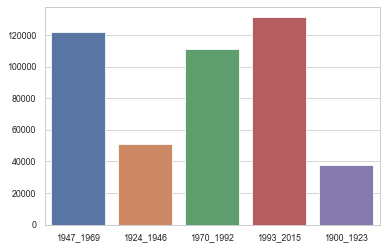

In [404]:
yr_built_unique = df.yr_built.unique()
n_construction  = [df[df.yr_built == j].size for j in df.yr_built.unique()]
sns.barplot(x=yr_built_unique, y=n_construction)

<p style="color:DodgerBlue;">make sure our variable have 'int' dtype</p>

In [405]:
df.condition=df.condition.astype(int)
df.waterfront=df.waterfront.astype(int)
df.floors=df.floors.astype(int)
df.renovated=df.renovated.astype(int)
df.grade=df.grade.astype(int)

<h2 id="one_hat">ONE-HOT-ENCODING</h2>
<p style="color:DodgerBlue;"></p>

In [406]:
#create a dummy data by removing redundant columns when using get_dummies
df_categories = pd.DataFrame()

for cat in var_categories:
    df_categories[cat]=df[cat].astype('category')
    df_dummy = pd.get_dummies(df_categories[cat], prefix=cat, drop_first=True) 
    df_categories = df_categories.join(df_dummy)
    df_categories.drop(labels=cat, axis=1, inplace=True)

<h2 id="corr_matrix">CORRELATION MATRIX</h2>
<p style="color:DodgerBlue;"></p>

Text(0.5, 1.0, 'Correlation between features')

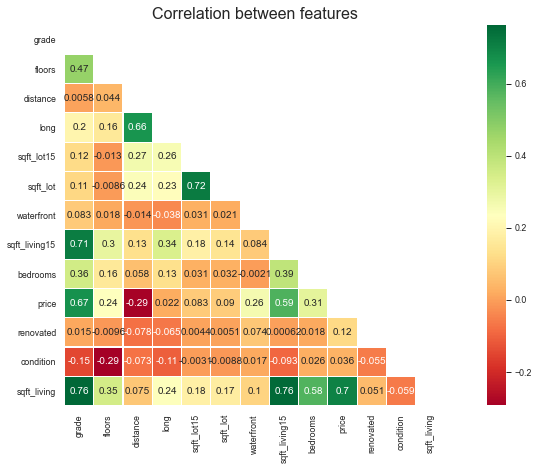

In [407]:
cor_features = set(df.columns)-set(('zipcode', 'view', 'sqft_basement','sqft_above','lon','lat','bathrooms'))
corr = df[cor_features].corr(method='pearson')
# mask = corr[(corr !=1.000)]
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 7))
sns.heatmap(corr, mask=mask, annot=True, linewidth=.1, cmap="RdYlGn", square=True)
plt.title('Correlation between features', fontdict={'fontsize': 16})

<!--
predictors_corr = func.correlation(corr,.7,1)
df[var_predictors].corr()['price'].sort_values(ascending=False)
-->

<a href="#top">TOP</a>

<h2 id="pairplot">CHECK FEATURES DISTRIBUTION</h2>
<p style="color:DodgerBlue;">
We would like to investigate the relationship between our target variable price and the continuous feature variables in our dataset. We will make use of Seaborn's jointplot to simultaneously inspect linearity and distributions.
</p>

In [408]:
df_features = pd.DataFrame(df[var_predictors-var_categories])

In [ ]:
sns.pairplot(df_features, diag_kind="kde")

<h2 id="log_transform">Log Transformation</h2>
<p style="color:DodgerBlue;"></p><p style="color:DodgerBlue;"></p>

In [ ]:
log_transformer = FunctionTransformer(np.log)
for col in df_features.columns: #.difference(['price']):
    df_features[col] = FunctionTransformer(np.log).transform(df_features[col])

<h2 id="standard_scaler">STANDARD SCALER</h2>
<p style="color:DodgerBlue;">Using the standard  function from sklearn to scale the indepedent variables, so that all the features hold a standard weight towards the depedent variable.</p>

In [ ]:
scaler =  MinMaxScaler()
for col in df_features.columns: #.difference(['price']):
    df_features[col] = scaler.fit_transform(df_features[col].values.reshape(-1,1))

In [ ]:
df_features.head()

we begin modeling with contionues variables

In [ ]:
y_features = df_features['price']
x_features = df_features.drop(labels=['price'], axis=1)
x_features = sm.add_constant(x_features)

model1     = sm.OLS(y_features, x_features).fit()
print(str(model1.summary()))

In [ ]:
df_model = pd.concat([df_features, df_categories], axis= 1)

x          = df_model.drop(labels=['price'], axis=1)
y          = df_model['price']

In [78]:
x_constant = sm.add_constant(x)
model2     = sm.OLS(y,x_constant).fit()
y2_pred    = model2.predict(x_constant)
print(str(model2.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     2256.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:08:17   Log-Likelihood:                 31188.
No. Observations:               21597   AIC:                        -6.232e+04
Df Residuals:                   21567   BIC:                        -6.208e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0028      0

<p style="color:DodgerBlue;">
For an initial fit the model looks good by obtaining a R-Squared of 0.755 and a Adj. R-squared of the same value 0.755.
The contribution is attributed to the categorical variabers that make the model more stable and positive.</p>
<p style="color:DodgerBlue;">
Surprisingly the P version of continuous variables is lower than the threshold of 0.05 except SQFT_LOT15. Furthermore, some categories that exceed the cut-off threshold, so we begin to discard these variables while maintaining those with a value of less than .05.</p>

In [83]:
rmse(y, y2_pred)

0.05709493843943358

In [80]:
# coeff2 = model2.params.iloc[1:].abs()
# sns.barplot(coeff2.values, coeff2.index, orient='h')

In [104]:
stepwise_result = func.stepwise_selection(x, y, verbose=False)
print('resulting features:')
print(stepwise_result)

resulting features:
['sqft_living15', 'grade', 'distance', 'sqft_living', 'sqft_lot', 'waterfront_1', 'condition_5', 'condition_4', 'renovated_1', 'yr_built_1993_2015', 'bedrooms_2', 'condition_3', 'yr_built_1970_1992', 'yr_built_1947_1969', 'floors_3', 'bedrooms_3']


In [105]:
len(stepwise_result)

16

In [114]:
df_stepwise = x[stepwise_result]

x_stepwise  = sm.add_constant(df_stepwise)
model3      = sm.OLS(y,x_stepwise).fit()

print(str(model3.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     4077.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:42:23   Log-Likelihood:                 31160.
No. Observations:               21597   AIC:                        -6.229e+04
Df Residuals:                   21580   BIC:                        -6.215e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0044      0

In [ ]:
# list(i for i in model2.pvalues[ (model2.pvalues.values <= 0.05) ].index if i != 'const')

In [115]:
features = list(i for i in model2.pvalues[ (model2.pvalues.values < 0.05) ].index if i != 'const')
df_model4 = x[features]

# x          = df_model.drop(labels='price', axis=1)
# y          = df_model['price']
x_constant = sm.add_constant(df_model4)
model4      = sm.OLS(y,x_constant).fit()

print(str(model4.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3114.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:43:01   Log-Likelihood:                 31182.
No. Observations:               21597   AIC:                        -6.232e+04
Df Residuals:                   21575   BIC:                        -6.214e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0135      0

## Sklearn Models
Regression Model Validation

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=7)

linreg = LinearRegression()
linreg.fit(x_train, y_train)

#Calculating predictions on the train set, and test set
y_hat_train = linreg.predict(x_train)
y_hat_test  = linreg.predict(x_test)

#Calculating your residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

#Calculating the Mean Squared Error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse  = mean_squared_error(y_test, y_hat_test)

print("\033[94m"f"{'R^2 Score':<30}{round(linreg.score(x, y),2):>5}")
print(f"{'Train Mean Squarred Error':<30} {train_mse:>5}")
print(f"{'Test Mean Squarred Error':<30} {test_mse:>5}")

R^2 Score                      0.75
Train Mean Squarred Error      0.0032404846600340978
Test Mean Squarred Error       0.0033149704597781474


In [ ]:
#MAE
metrics.mean_absolute_error
#MSE
metrics.mean_squared_error
#RMSE
np.sqrt(metrics.mean_squared_error)

In [87]:
np.sqrt(2**2)

2.0

In [ ]:
pd.read_csv()

In [111]:
# stepwise_result = func.stepwise_selection(x, y, verbose=False)
# print('resulting features:')
# print(stepwise_result)

In [112]:
# x1 = df_model[stepwise_result]
# # y = df_model['price']

# model3  = sm.OLS(y, sm.add_constant(x1)).fit()
# # result3 = model3.fit()
# print(str(model3.summary()))

In [113]:
linreg = LinearRegression()

kf = KFold(n_splits=10, shuffle=True, random_state=74)

mse = cross_val_score(linreg, x, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=1)
r2  = cross_val_score(linreg, x, y, scoring='r2', cv=kf, n_jobs=1)

print('{:15s}{:<5.2f}'.format('Accuracy', round(np.mean(mse),2)))
print('{:15s}{:<5.2f}'.format('R Squared', round(np.mean(r2),2)))

#scoring = --> https://scikit-learn.org/stable/modules/model_evaluation.html

Accuracy       -0.00
R Squared      0.75 
